In [3]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

def score(features):
    model = LinearRegression().fit(X[features], y)
    pred = model.predict(X[features])
    r2 = r2_score(y, pred)
    rmse = np.sqrt(mean_squared_error(y, pred))   # <-- FIXED
    return r2, rmse

baseline_features = ["bmi", "s5"]
baseline_r2, baseline_rmse = score(baseline_features)
print("Baseline (bmi + s5):")
print(" R2:", baseline_r2)
print(" RMSE:", baseline_rmse)

results = {}
for f in X.columns:
    if f not in baseline_features:
        results[f] = score(baseline_features + [f])

best_var = max(results, key=lambda k: results[k][0])
best_r2, best_rmse = results[best_var]

print("\nBest next variable:", best_var)
print(" R2:", best_r2)
print(" RMSE:", best_rmse)

all_r2, all_rmse = score(list(X.columns))
print("\nAll variables:")
print(" R2:", all_r2)
print(" RMSE:", all_rmse)


Baseline (bmi + s5):
 R2: 0.45948527963926644
 RMSE: 56.6143981406219

Best next variable: bp
 R2: 0.48008243046470156
 RMSE: 55.52523159092378

All variables:
 R2: 0.5177484222203499
 RMSE: 53.47612876402657


Columns in dataset:
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

Correlation Matrix:
                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


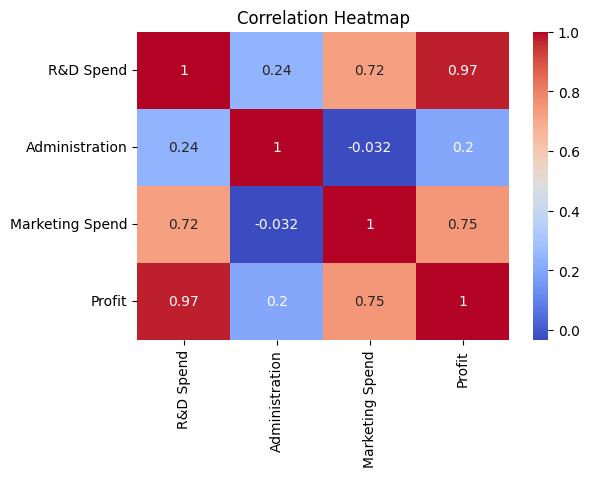

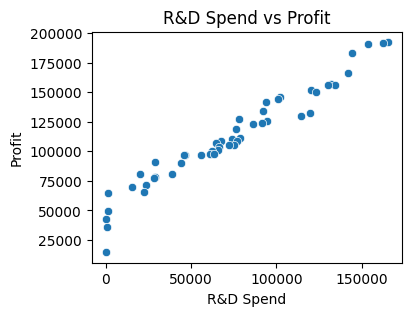

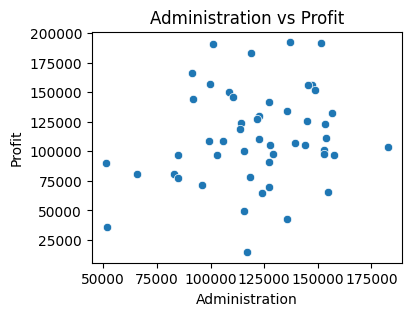

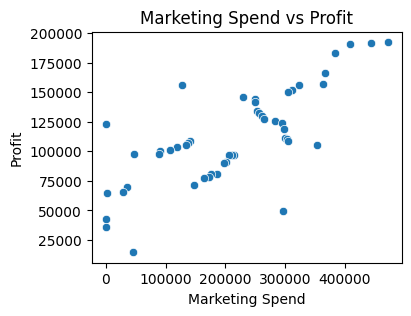


Model Performance:
Training RMSE: 8938.013440232064


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("50_Startups.csv", delimiter=",")

print("Columns in dataset:")
print(df.columns)

numeric_df = df.drop(columns=["State"])
corr = numeric_df.corr()

print("\nCorrelation Matrix:")
print(corr)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

features = ["R&D Spend", "Administration", "Marketing Spend"]
target = "Profit"


X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
train_r2 = r2_score(y_train, train_pred)

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
test_r2 = r2_score(y_test, test_pred)

print("\nModel Performance:")
print("Training RMSE:", train_rmse)


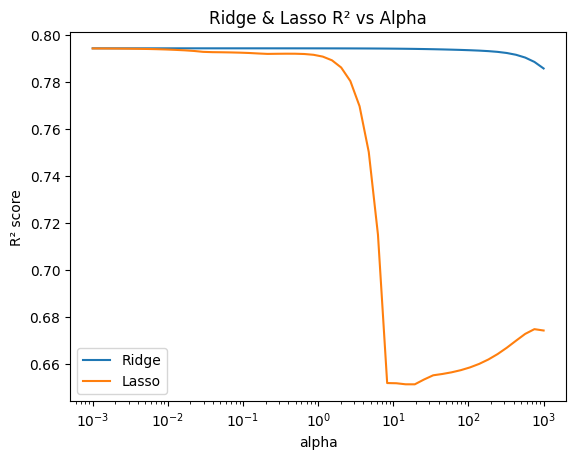

Best Ridge alpha: 0.001
Best Lasso alpha: 0.001


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


df = pd.read_csv("Auto.csv", na_values="?")
df = df.dropna()

X = df.drop(columns=["mpg", "name", "origin"])
y = df["mpg"]

alphas = np.logspace(-3, 3, 50)
ridge_scores = []
lasso_scores = []

for a in alphas:
    ridge = Ridge(alpha=a).fit(X_train, y_train)
    lasso = Lasso(alpha=a, max_iter=5000).fit(X_train, y_train)

    ridge_scores.append(r2_score(y_test, ridge.predict(X_test)))
    lasso_scores.append(r2_score(y_test, lasso.predict(X_test)))

"""
plt.semilogx(alphas, ridge_scores, label="Ridge")
plt.semilogx(alphas, lasso_scores, label="Lasso")
plt.xlabel("alpha")
plt.ylabel("R² score")
plt.title("Ridge & Lasso R² vs Alpha")   # <-- properly closed
plt.legend()
plt.show()

"""
BEST ALPHA VALUES
"""
print("Best Ridge alpha:", alphas[np.argmax(ridge_scores)])
print("Best Lasso alpha:", alphas[np.argmax(lasso_scores)])
